In [1]:
#HOW TO SOLVE THE Scipy ERROR IN PYTHON 3, SEE ON CELL NO 7 SOLUTION
!git clone https://github.com/niazwazir/SRCNN-Keras.git

Cloning into 'SRCNN-Keras'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 99 (delta 7), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (99/99), done.


In [2]:
!ls

sample_data  SRCNN-Keras


In [3]:
cd SRCNN-Keras

/content/SRCNN-Keras


In [4]:
!ls

baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
Brain.jpg
butterfly_GT.bmp
head_GT.bmp
Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
prepare_data.py
project.gif
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
Set5
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
subpixel.py
text
woman_GT.bmp
yang91.zip


In [5]:
!unzip yang91.zip

Archive:  yang91.zip
   creating: yang91/
  inflating: yang91/tt9.bmp          
  inflating: yang91/tt8.bmp          
  inflating: yang91/tt7.bmp          
  inflating: yang91/tt6.bmp          
  inflating: yang91/tt5.bmp          
  inflating: yang91/tt4.bmp          
  inflating: yang91/tt3.bmp          
  inflating: yang91/tt27.bmp         
  inflating: yang91/tt26.bmp         
  inflating: yang91/tt25.bmp         
  inflating: yang91/tt24.bmp         
  inflating: yang91/tt23.bmp         
  inflating: yang91/tt22.bmp         
  inflating: yang91/tt21.bmp         
  inflating: yang91/tt20.bmp         
  inflating: yang91/tt2.bmp          
  inflating: yang91/tt19.bmp         
  inflating: yang91/tt18.bmp         
  inflating: yang91/tt17.bmp         
  inflating: yang91/tt16.bmp         
  inflating: yang91/tt15.bmp         
  inflating: yang91/tt14.bmp         
  inflating: yang91/tt13.bmp         
  inflating: yang91/tt12.bmp         
  inflating: yang91/tt10.bmp         
  inflat

In [6]:
!pip uninstall scipy

Found existing installation: scipy 1.4.1
Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1


In [8]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2 MB 189 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.4 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt
import keras
import tensorflow

In [13]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('elu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('elu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('elu', name='act3')(C3)
model = Model(input_img, A3)
opt = tensorflow.keras.optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 CONV1 (Conv2D)              (None, 32, 32, 64)        5248      
                                                                 
 act1 (Activation)           (None, 32, 32, 64)        0         
                                                                 
 CONV2 (Conv2D)              (None, 32, 32, 32)        2080      
                                                                 
 act2 (Activation)           (None, 32, 32, 32)        0         
                                                                 
 CONV3 (Conv2D)              (None, 32, 32, 1)         801       
                                                                 
 act3 (Activation)           (None, 32, 32, 1)         0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
import tensorflow as tf

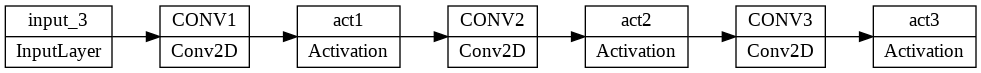

In [17]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [18]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2
    if len(image.shape) == 3:
        h, w, _ = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w, :]
    else:
        h, w = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w]
    return image

In [19]:
def create_LR(image,scale):
    label_ = modcrop(image, scale)
    label_ = label_ / 255.
    input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
    input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
    return input_

In [20]:
path = 'yang91/'
files_y = glob.glob(path + '*.*')
trainfiles = files_y[:60]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[60:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16
X_train = []
Y_train = []
X_val = []
Y_val = []

In [21]:
# Extract patch image for training
for file_y in trainfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2) #############################################################SCALE###########
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,y:y+img_size].reshape(img_size,img_size,1)
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
            X_train.append(sub_input)
            Y_train.append(sub_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Extract patch image for validation
for file_y in valfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2)###########################################################SCALE################
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            X_val.append(sub_input)
            Y_val.append(sub_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [24]:
LEARN_RATE = 1.0e-4

In [28]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD

In [29]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [30]:
model.compile(loss='mse', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
history = model.fit(X_train, Y_train,
                    batch_size = 128,
                    epochs = 500, # number of iterations
                    validation_data= (X_val, Y_val),
                    callbacks=[checkpoint],
                    verbose=1)

Epoch 1/500
112/112 [==============================] - 2s 21ms/step - loss: 484.5235 - accuracy: 3.4246e-04 - val_loss: 603.1169 - val_accuracy: 0.0000e+00
Epoch 2/500
112/112 [==============================] - 2s 21ms/step - loss: 470.9720 - accuracy: 3.4602e-04 - val_loss: 588.6639 - val_accuracy: 0.0000e+00
Epoch 3/500
112/112 [==============================] - 2s 21ms/step - loss: 456.8326 - accuracy: 3.4909e-04 - val_loss: 573.5207 - val_accuracy: 0.0000e+00
Epoch 4/500
112/112 [==============================] - 2s 21ms/step - loss: 441.9596 - accuracy: 3.4992e-04 - val_loss: 557.4783 - val_accuracy: 0.0000e+00
Epoch 5/500
112/112 [==============================] - 2s 20ms/step - loss: 426.2077 - accuracy: 3.4998e-04 - val_loss: 540.4614 - val_accuracy: 0.0000e+00
Epoch 6/500
112/112 [==============================] - 2s 20ms/step - loss: 409.5449 - accuracy: 3.5122e-04 - val_loss: 522.2901 - val_accuracy: 0.0000e+00
Epoch 7/500
112/112 [==============================] - 2s 20ms/s

Text(0.5, 1.0, 'Loss Curves')

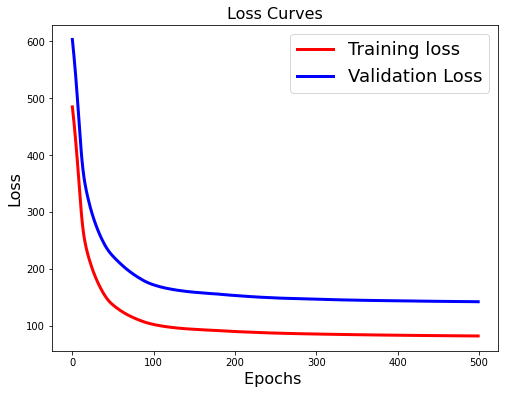

In [33]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [1]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

NameError: ignored

In [ ]:
scores = model.evaluate(X_val, Y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
model.save('wscale2.h5')

In [ ]:
img_o = scipy.misc.imread('baby_x2_GT.png',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,2) #################################################################SCALE#################
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
        piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('wscale2.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
        i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred1.bmp',img_save)

In [ ]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
LR       = cv2.imread("blurred1.bmp")
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse ==0:
        return 100
    PIXEL_MAX = 255.0
    return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)

In [ ]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = plt.subplot("131")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)

ax = plt.subplot("132")
ax.imshow(LR)
ax.set_title("blurred_Image")
plt.grid(0)

ax = plt.subplot("133")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()